<a href="https://colab.research.google.com/github/SriChaCodes/Churn_modelling/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.13.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
#import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset= pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
## Feature Engineering ( to handle characteristic features)
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)



In [12]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
X=pd.concat([X,geography,gender],axis=1)

In [14]:
#splitting the dataset into Training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #removes the mean and scales the data to unit variance.
X_train = sc.fit_transform(X_train) #to learn the scaling parameters
X_test = sc.transform(X_test) #used on the test data to transform it using the parameters learned from the training data

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
X_train.shape

(8000, 14)

In [19]:
X_test.shape

(2000, 14)

In [23]:
## Creating the ANN
from tensorflow.keras.models import Sequential #we can do FP & BP
from tensorflow.keras.layers import Dense #we will be able to create neurons,HL,I/P L,O/P L
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU #activstion functions
from tensorflow.keras.layers import Dropout #


In [24]:
### intialising the ANN
classifier = Sequential()

In [25]:
# Adding the input layer
classifier.add(Dense(units=14,activation='relu'))

In [51]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [52]:
# adding the second hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [53]:
## adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [54]:
## THE NEURAL NETWORK IS READY NOW!!

In [55]:
## for including learning rate in the optimiser
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [56]:
## Early stopping  ( when accuracy of the model is not inxreasing and it'll stop)
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [57]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
#Train the Neural network
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.4358 - accuracy: 0.8263 - val_loss: 0.3961 - val_accuracy: 0.8455
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4138 - accuracy: 0.8352 - val_loss: 0.3975 - val_accuracy: 0.8432
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3960 - accuracy: 0.8378 - val_loss: 0.3944 - val_accuracy: 0.8493
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4079 - accuracy: 0.8332 - val_loss: 0.4068 - val_accuracy: 0.8357
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4070 - accuracy: 0.8272 - val_loss: 0.4008 - val_accuracy: 0.8429
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3993 - accuracy: 0.8293 - val_loss: 0.3980 - val_accuracy: 0.8466
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8386 - val_loss: 0.3992 - val_accuracy:

In [59]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

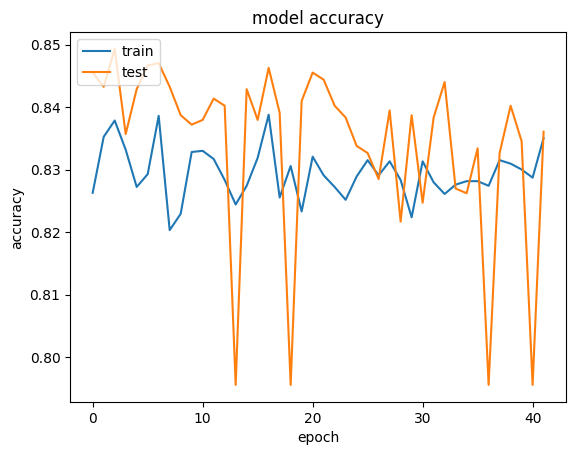

In [60]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [61]:
# making predictions and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [62]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1578,   17],
       [ 282,  123]])

In [63]:
##calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [64]:
score

0.8505

In [65]:
#get the weighhts
classifier.get_weights()

[array([[ 2.49301815e+00, -5.18419743e-01,  3.59550548e+00,
          1.39421618e+00, -7.41451263e-01, -1.52369475e+00,
          1.31037819e+00,  3.07620674e-01, -2.13709965e-01,
         -7.10685432e-01, -5.69201671e-02, -1.90148556e+00,
          1.83352900e+00,  2.46778512e+00],
        [-9.48692977e-01,  3.95225501e+00, -4.92716455e+00,
         -5.01551437e+00, -4.78059769e+00,  7.90968001e-01,
         -5.13430297e-01,  1.23752093e+00,  4.81888056e+00,
         -7.05998802e+00, -6.75682020e+00, -1.94896936e+00,
         -1.20094824e+00,  3.86690187e+00],
        [-1.16677618e+00, -5.85122168e-01,  2.34461498e+00,
          3.44980526e+00, -1.86582136e+00, -7.68827200e-01,
         -2.59071159e+00, -3.12173933e-01,  6.42505229e-01,
         -2.94867015e+00, -4.54981625e-01,  1.48162949e+00,
          1.01755953e+00, -2.09849191e+00],
        [-3.47960424e+00, -1.23852789e+00,  2.66118479e+00,
         -4.32655001e+00, -6.65792942e-01, -3.96041608e+00,
          4.48581904e-01,  1